In [1]:
#importing all the required packages to manupilate and analyse dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#load the dataset
dataset=pd.read_csv("India Agriculture Crop Production.csv")

In [3]:
#To study the dataset intially
dataset.head()

,State,District,Crop,Year,Season,Area,Area Units,Production,Production Units,Yield
0,Andaman and Nicobar Islands,NICOBARS,Arecanut,2001-02,Kharif,1254.0,Hectare,2061.0,Tonnes,1.643541
1,Andaman and Nicobar Islands,NICOBARS,Arecanut,2002-03,Whole Year,1258.0,Hectare,2083.0,Tonnes,1.655803
2,Andaman and Nicobar Islands,NICOBARS,Arecanut,2003-04,Whole Year,1261.0,Hectare,1525.0,Tonnes,1.209358
3,Andaman and Nicobar Islands,NORTH AND MIDDLE ANDAMAN,Arecanut,2001-02,Kharif,3100.0,Hectare,5239.0,Tonnes,1.690000
4,Andaman and Nicobar Islands,SOUTH ANDAMANS,Arecanut,2002-03,Whole Year,3105.0,Hectare,5267.0,Tonnes,1.696296


In [4]:
#to retrieve size of dataset(rows and columns)
dataset.shape

(345407, 10)

In [5]:
#to get information of columns in the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 345407 entries, 0 to 345406
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   State             345407 non-null  object 
 1   District          345407 non-null  object 
 2   Crop              345375 non-null  object 
 3   Year              345407 non-null  object 
 4   Season            345406 non-null  object 
 5   Area              345374 non-null  float64
 6   Area Units        345407 non-null  object 
 7   Production        340414 non-null  float64
 8   Production Units  345407 non-null  object 
 9   Yield             345374 non-null  float64
dtypes: float64(3), object(7)
memory usage: 26.4+ MB


In [6]:
# to know no of null values in each column
dataset.isnull().sum()

State                  0
District               0
Crop                  32
Year                   0
Season                 1
Area                  33
Area Units             0
Production          4993
Production Units       0
Yield                 33
dtype: int64

In [7]:
#drop the rows that containing null values
dataset.dropna(subset=['Production'], inplace=True)

In [8]:
dataset.isnull().sum()

State               0
District            0
Crop                0
Year                0
Season              0
Area                0
Area Units          0
Production          0
Production Units    0
Yield               0
dtype: int64

In [9]:
#to know no of duplicate values in dataset
dataset.duplicated().sum()

0

In [10]:
# Drop the unneccessary columns
dataset.drop(["Production Units","Area Units","Season"],axis=1,inplace=True)

In [11]:
dataset.rename(columns={"Production":"Sales"},inplace=True)

In [12]:
dataset.head()

,State,District,Crop,Year,Area,Sales,Yield
0,Andaman and Nicobar Islands,NICOBARS,Arecanut,2001-02,1254.0,2061.0,1.643541
1,Andaman and Nicobar Islands,NICOBARS,Arecanut,2002-03,1258.0,2083.0,1.655803
2,Andaman and Nicobar Islands,NICOBARS,Arecanut,2003-04,1261.0,1525.0,1.209358
3,Andaman and Nicobar Islands,NORTH AND MIDDLE ANDAMAN,Arecanut,2001-02,3100.0,5239.0,1.690000
4,Andaman and Nicobar Islands,SOUTH ANDAMANS,Arecanut,2002-03,3105.0,5267.0,1.696296


In [13]:
# to get statistical data
dataset.describe()

,Area,Sales,Yield
count,3.404140e+05,3.404140e+05,340414.000000
mean,1.182535e+04,9.583711e+05,80.564577
std,4.612484e+04,2.152986e+07,923.232000
min,8.000000e-03,0.000000e+00,0.000000
25%,8.000000e+01,8.700000e+01,0.567920
50%,5.630000e+02,7.170000e+02,1.025000
75%,4.257000e+03,7.176000e+03,2.500000
max,8.580100e+06,1.597800e+09,43958.333333


In [14]:
#to know datatypes
dataset.dtypes

State        object
District     object
Crop         object
Year         object
Area        float64
Sales       float64
Yield       float64
dtype: object

<AxesSubplot:xlabel='count', ylabel='State'>

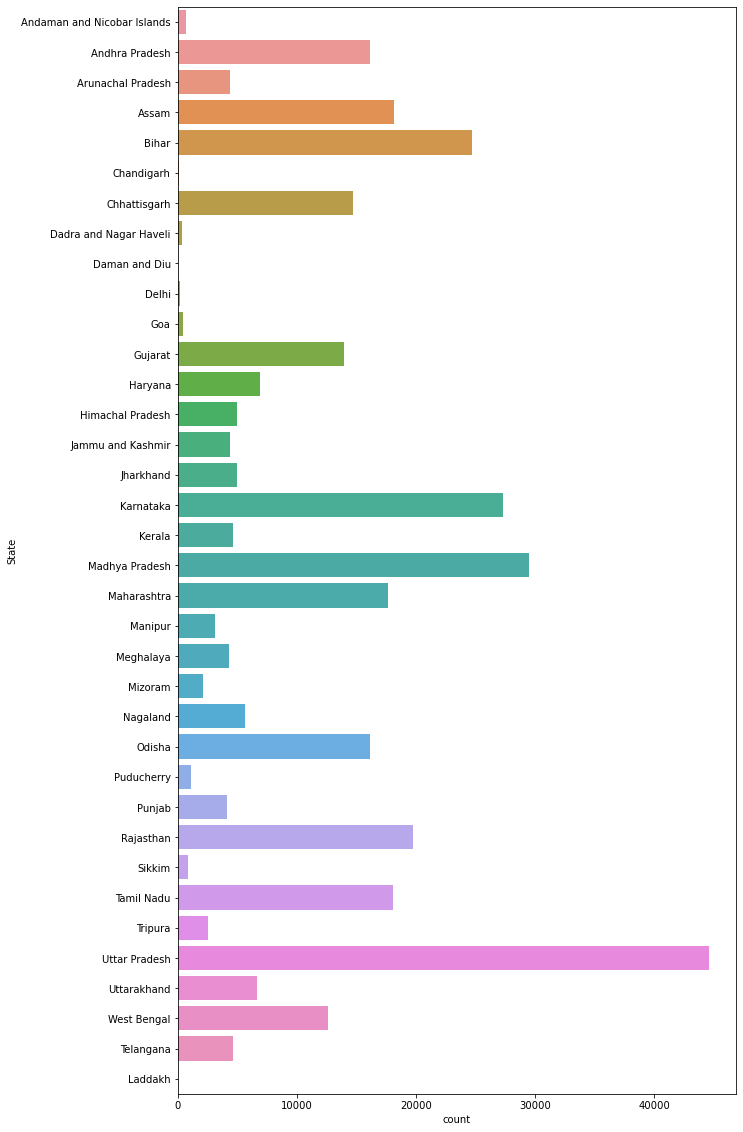

In [15]:
plt.figure(figsize=(10,20))
sns.countplot(y=dataset["State"])

<AxesSubplot:xlabel='count', ylabel='Crop'>

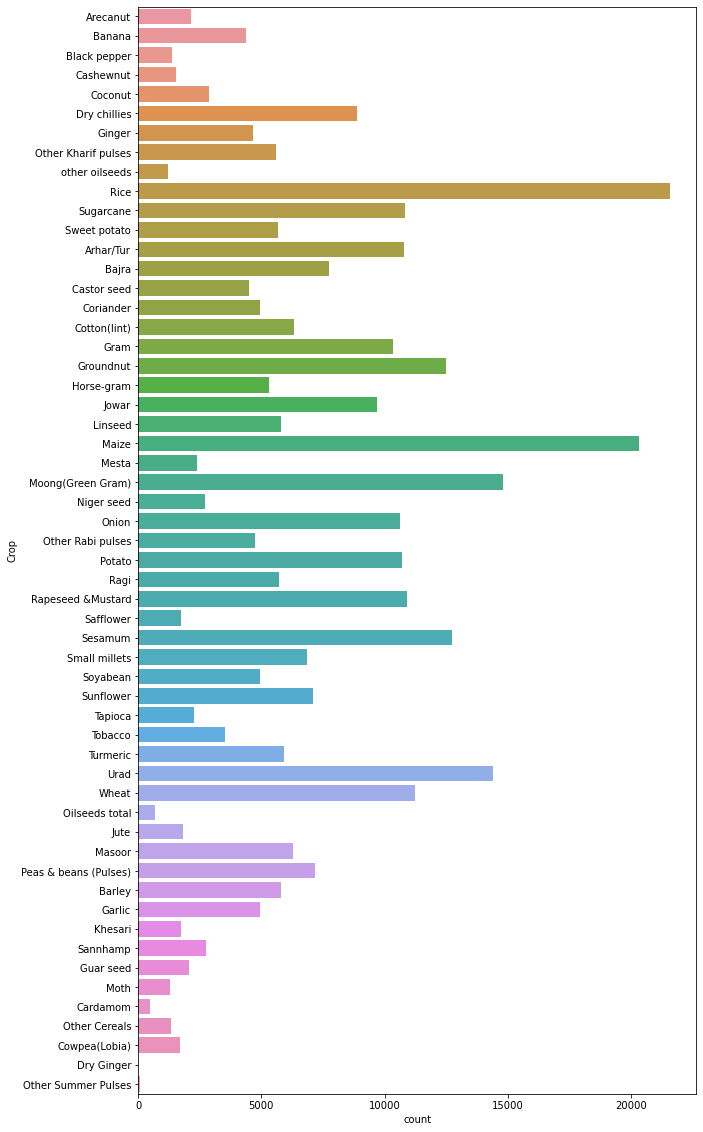

In [16]:
plt.figure(figsize=(10,20))
sns.countplot(y=dataset["Crop"])

<AxesSubplot:xlabel='count', ylabel='District'>

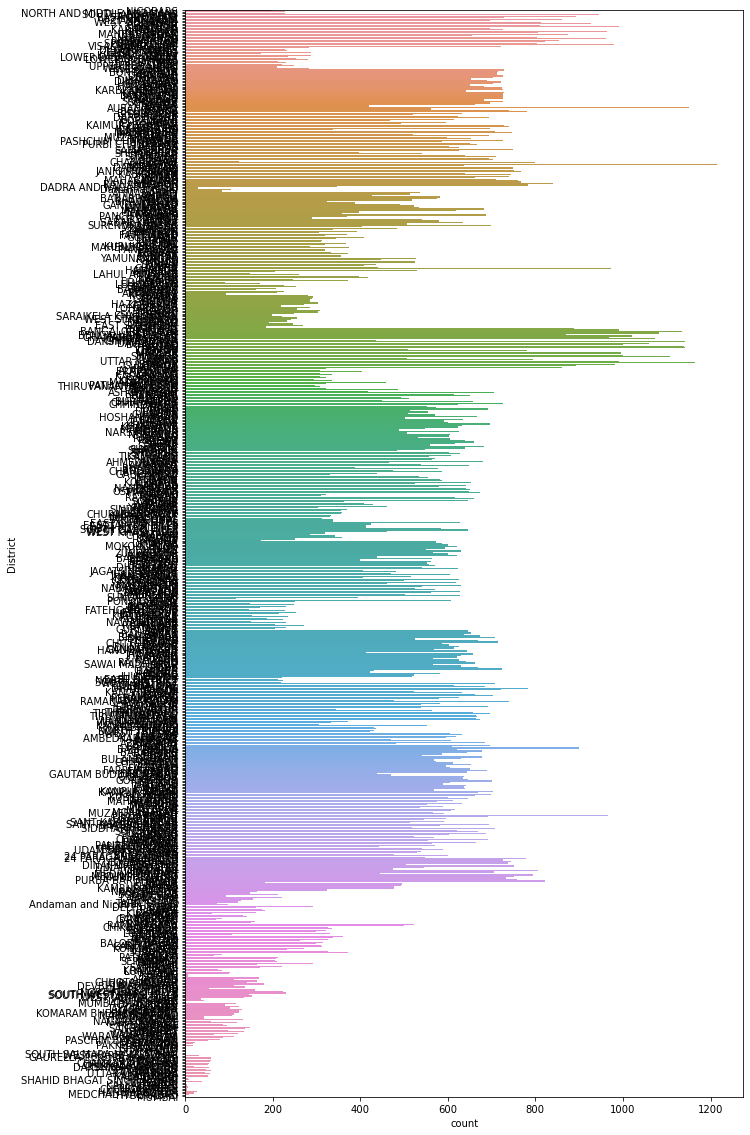

In [17]:
plt.figure(figsize=(10,20))
sns.countplot(y=dataset["District"])

In [18]:
State_unique=dataset["State"].unique()
sales_per_state=[]
for i in State_unique:
    sales_per_state.append(dataset[dataset["State"]==i]["Sales"].sum())

In [19]:
 sales_per_state

[2053354805.2059999,
 26076218605.0,
 9522010.399999999,
 3637714928.0,
 544953532.66,
 89781.5,
 143096606.0,
 2504544.0,
 59267.08,
 2666022.0,
 2194003548.49,
 807581678.46,
 589739640.0,
 32297145.037,
 30412654.097276714,
 43793837.4049689,
 63772797345.19677,
 129700649855.71399,
 824851675.943,
 1878564917.5,
 18764607.555,
 16516629.7,
 2769753.37,
 18748701.5,
 194079938.5,
 493815573.0,
 781551409.0,
 589164332.27,
 2744927.0,
 78051759360.879,
 16952052.432,
 4442585305.8,
 179697348.0,
 8941179119.704,
 147754633.7,
 109.2]

Text(0, 0.5, 'States')

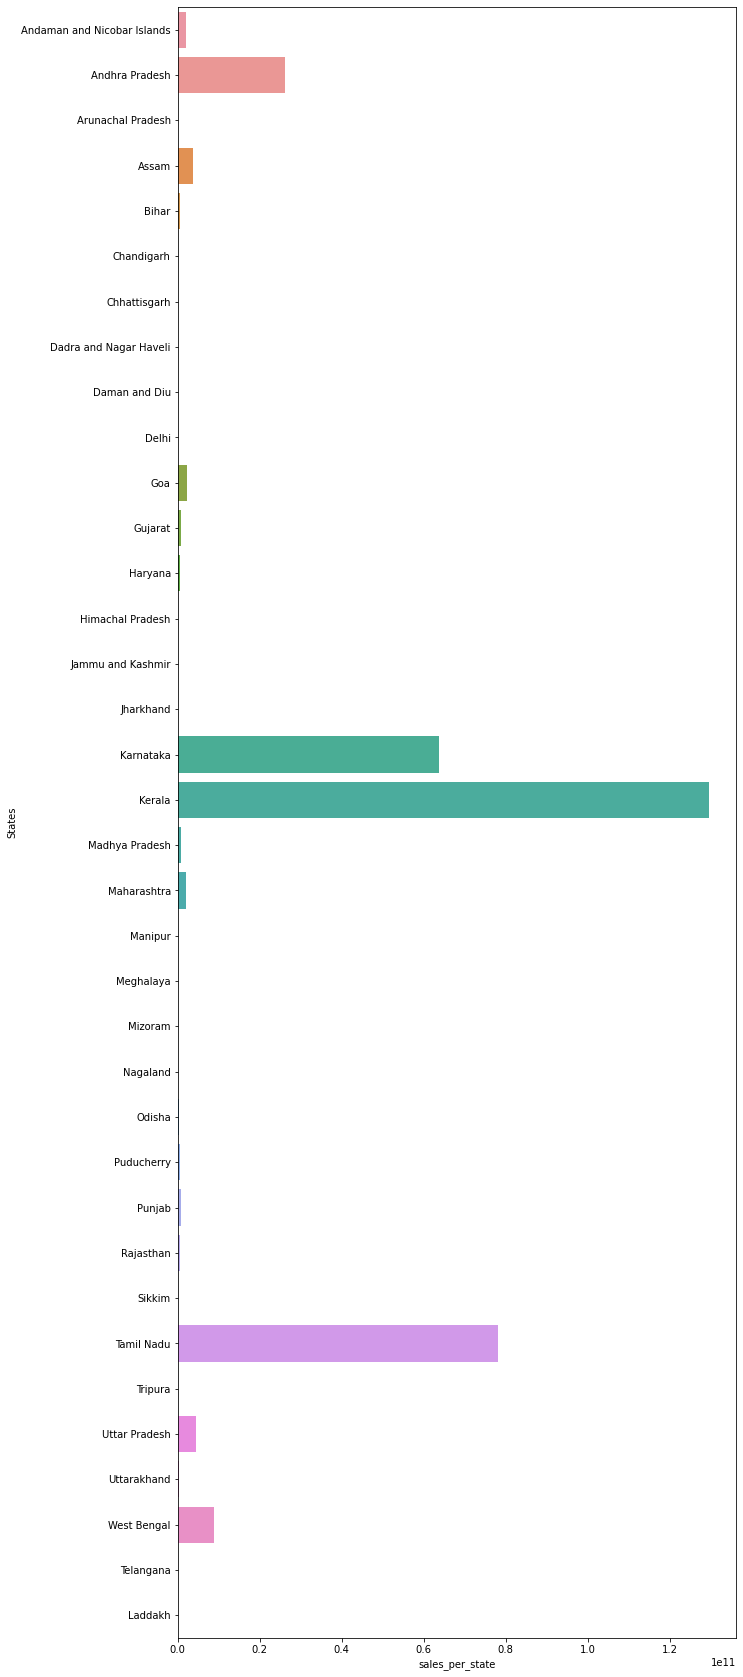

In [20]:
plt.figure(figsize=(10,30))
sns.barplot(x=sales_per_state,y=State_unique)
plt.xlabel("sales_per_state")
plt.ylabel("States")

In [21]:
dataset["Crop"].value_counts()

Rice                     21573
Maize                    20329
Moong(Green Gram)        14813
Urad                     14389
Sesamum                  12744
Groundnut                12515
Wheat                    11219
Rapeseed &Mustard        10919
Sugarcane                10826
Arhar/Tur                10774
Potato                   10729
Onion                    10621
Gram                     10330
Jowar                     9682
Dry chillies              8890
Bajra                     7740
Peas & beans (Pulses)     7179
Sunflower                 7104
Small millets             6859
Cotton(lint)              6318
Masoor                    6296
Turmeric                  5916
Barley                    5808
Linseed                   5793
Ragi                      5725
Sweet potato              5656
Other Kharif pulses       5590
Horse-gram                5294
Garlic                    4958
Coriander                 4954
Soyabean                  4953
Other Rabi pulses         4728
Ginger  

<AxesSubplot:xlabel='count', ylabel='Crop'>

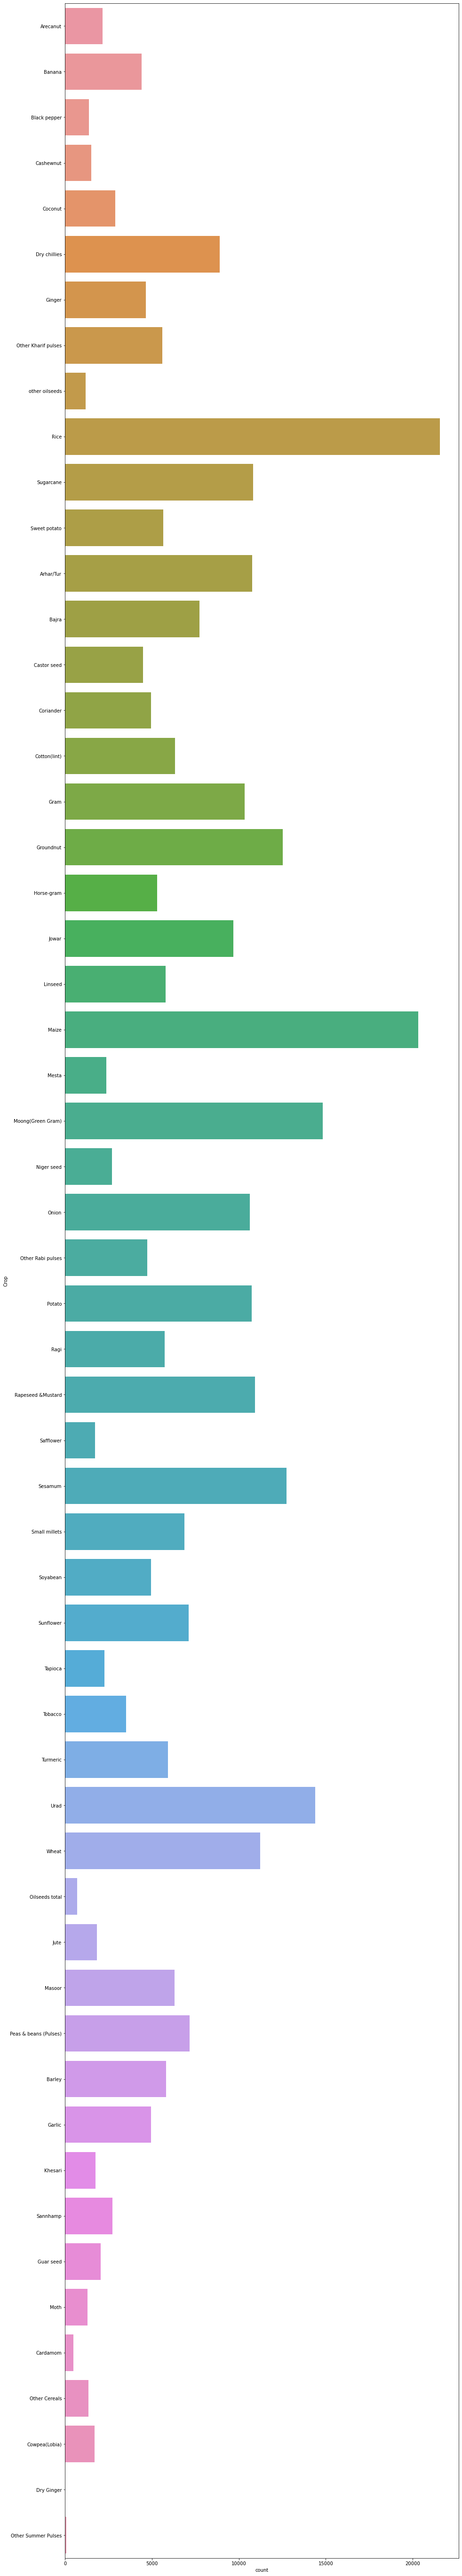

In [22]:
plt.figure(figsize=(15,100))
sns.countplot(y="Crop",data=dataset)

In [23]:
Unique_Crop=dataset["Crop"].unique()
Yield_per_crop=[]
for i in Unique_Crop:
    Yield_per_crop.append(dataset[dataset["Crop"]==i]["Yield"].sum())

In [24]:
 Yield_per_crop

[5195.920247929089,
 131785.22091572624,
 1421.9457995018447,
 10637.666279152736,
 25854915.777926005,
 14042.310071946962,
 31832.057992465932,
 3219.393433231183,
 1872.6646920553826,
 45349.19349752791,
 605887.988225031,
 53287.66145559827,
 9528.326231856354,
 9953.895909165394,
 3408.3954553303306,
 3409.990006382258,
 13670.563917656822,
 9204.293716992823,
 16503.79053599328,
 2593.4879651127167,
 10441.565440524728,
 3209.160114991437,
 54413.3974188939,
 12874.640057781198,
 7432.137682577304,
 1021.7510701377328,
 140682.32786921161,
 3550.50431259295,
 141433.39416636594,
 7300.17582826722,
 9095.483951712396,
 956.1292235245286,
 6498.163700972174,
 4825.693044583812,
 5283.100453720188,
 6862.655516765721,
 42876.62080941798,
 7035.941467427474,
 23241.167262619223,
 7894.83770024514,
 24977.171862195635,
 1049.1002623445515,
 17957.521334247373,
 4712.107977922539,
 10282.459217489863,
 11287.878744860278,
 20050.33206087837,
 1403.4294431435092,
 4152.725906624872,
 18

Text(0, 0.5, 'Crops')

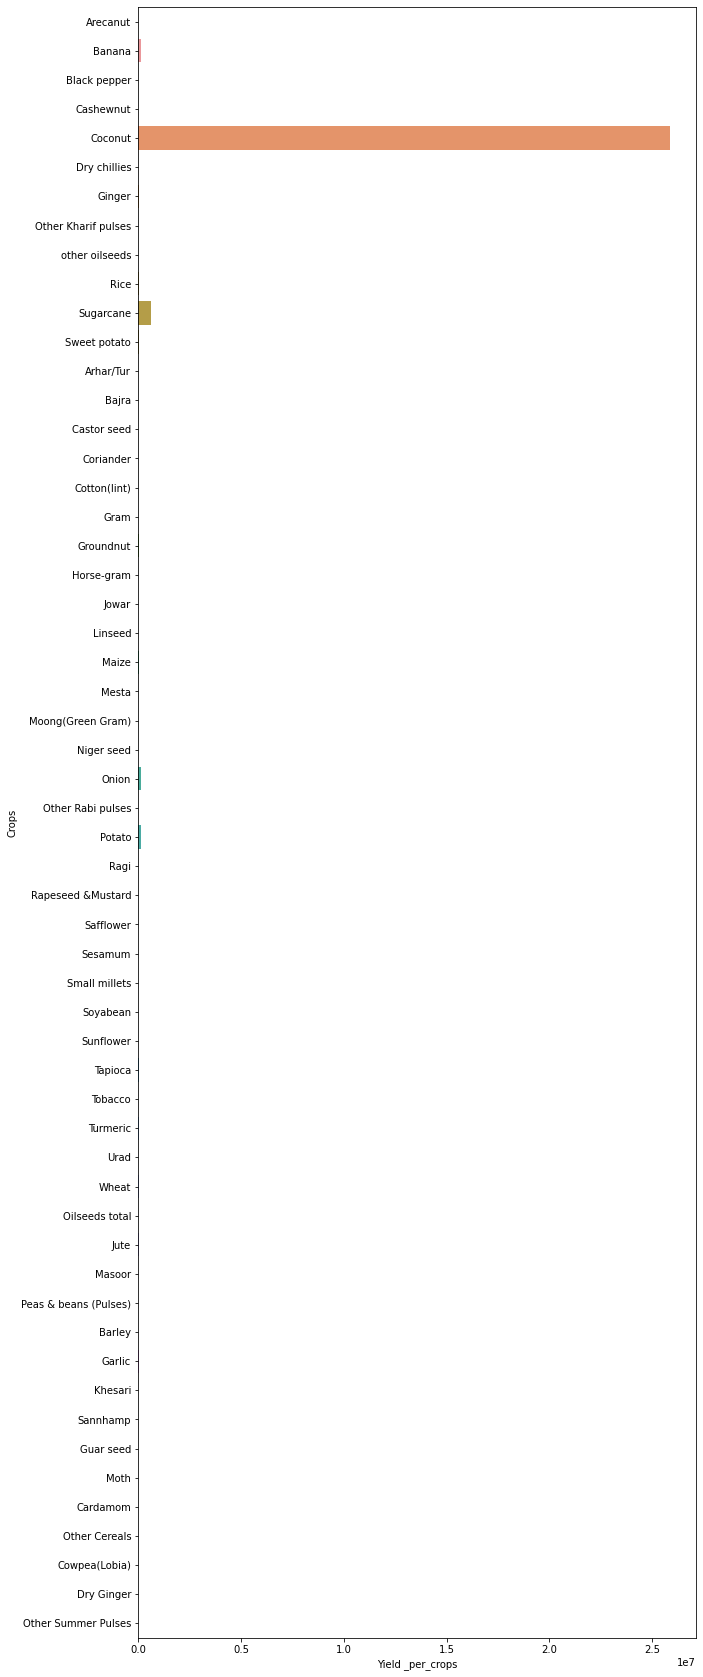

In [25]:
plt.figure(figsize=(10,30))
sns.barplot(x=Yield_per_crop,y=Unique_Crop)
plt.xlabel("Yield _per_crops")
plt.ylabel("Crops")

In [26]:
dataset.head()

,State,District,Crop,Year,Area,Sales,Yield
0,Andaman and Nicobar Islands,NICOBARS,Arecanut,2001-02,1254.0,2061.0,1.643541
1,Andaman and Nicobar Islands,NICOBARS,Arecanut,2002-03,1258.0,2083.0,1.655803
2,Andaman and Nicobar Islands,NICOBARS,Arecanut,2003-04,1261.0,1525.0,1.209358
3,Andaman and Nicobar Islands,NORTH AND MIDDLE ANDAMAN,Arecanut,2001-02,3100.0,5239.0,1.690000
4,Andaman and Nicobar Islands,SOUTH ANDAMANS,Arecanut,2002-03,3105.0,5267.0,1.696296


In [67]:
#rearrange the columns for 
col=["State","District","Crop","Year","Area","Yield","Sales"]
dataset=dataset[col]

In [68]:
X=dataset.drop("Sales",axis=1)
y=dataset["Sales"]

In [89]:
from sklearn.model_selection import train_test_split

In [358]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.001, random_state=42)

In [359]:
X_train.shape

(340073, 6)

In [360]:
X_test.shape

(341, 6)

In [361]:
X_train

,State,District,Crop,Year,Area,Yield
123066,Uttar Pradesh,RAE BARELI,Groundnut,2008-09,1780.0,0.744944
246567,Karnataka,GADAG,Urad,2018-19,155.0,0.483871
286251,Kerala,KOTTAYAM,Ginger,2019-20,113.0,3.247788
159158,Meghalaya,EAST KHASI HILLS,Soyabean,2010-11,225.0,1.066667
34668,Uttar Pradesh,BANDA,Barley,2001-02,1717.0,0.923704
...,...,...,...,...,...,...
122105,Uttar Pradesh,PILIBHIT,Barley,2008-09,17.0,2.705882
263316,Tamil Nadu,KANNIYAKUMARI,Groundnut,2017-18,4.0,2.500000
134232,Assam,BARPETA,Moong(Green Gram),2010-11,393.0,0.478372
149646,Karnataka,DAKSHIN KANNAD,Rice,2012-13,21201.0,2.593510


In [362]:
y_train

123066     1326.0
246567       75.0
286251      367.0
159158      240.0
34668      1586.0
           ...   
122105       46.0
263316       10.0
134232      188.0
149646    54985.0
124193     3318.0
Name: Sales, Length: 340073, dtype: float64

In [363]:
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

In [364]:
ohe=OneHotEncoder(drop="first",handle_unknown='ignore')
scaler=StandardScaler()

In [365]:
preprocessor=ColumnTransformer(
transformers=[
    ("onehotencoder",ohe,[0,1,2,3]),
    ("Standardization",scaler,[4,5])
],
    remainder="passthrough"
)

In [366]:
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehotencoder',
                                 OneHotEncoder(drop='first',
                                               handle_unknown='ignore'),
                                 [0, 1, 2, 3]),
                                ('Standardization', StandardScaler(), [4, 5])])

In [367]:
X_train_dummy=preprocessor.fit_transform(X_train)
X_test_dummy=preprocessor.transform(X_test)

In [368]:
X_test

,State,District,Crop,Year,Area,Yield
199432,Madhya Pradesh,VIDISHA,Potato,2013-14,243.0,10.539095
323844,Maharashtra,SOLAPUR,Sesamum,1998-99,700.0,0.428571
289274,Nagaland,KIPHIRE,Arhar/Tur,2019-20,100.0,0.900000
119533,Tamil Nadu,THOOTHUKUDI,Coriander,2009-10,5599.0,0.402215
241798,Jharkhand,DHANBAD,Maize,2017-18,2482.0,2.500000
...,...,...,...,...,...,...
315060,Karnataka,BELGAUM,Linseed,2000-01,2454.0,0.296251
316829,Karnataka,GULBARGA,Sweet potato,2000-01,31.0,6.612903
202931,Manipur,CHURACHANDPUR,Banana,2015-16,1117.0,13.166517
171890,Uttar Pradesh,DEORIA,Rapeseed &Mustard,2012-13,1865.0,0.664343


In [369]:
X_train

,State,District,Crop,Year,Area,Yield
123066,Uttar Pradesh,RAE BARELI,Groundnut,2008-09,1780.0,0.744944
246567,Karnataka,GADAG,Urad,2018-19,155.0,0.483871
286251,Kerala,KOTTAYAM,Ginger,2019-20,113.0,3.247788
159158,Meghalaya,EAST KHASI HILLS,Soyabean,2010-11,225.0,1.066667
34668,Uttar Pradesh,BANDA,Barley,2001-02,1717.0,0.923704
...,...,...,...,...,...,...
122105,Uttar Pradesh,PILIBHIT,Barley,2008-09,17.0,2.705882
263316,Tamil Nadu,KANNIYAKUMARI,Groundnut,2017-18,4.0,2.500000
134232,Assam,BARPETA,Moong(Green Gram),2010-11,393.0,0.478372
149646,Karnataka,DAKSHIN KANNAD,Rice,2012-13,21201.0,2.593510


In [370]:
X_train_dummy

<340073x842 sparse matrix of type '<class 'numpy.float64'>'
	with 2028428 stored elements in Compressed Sparse Row format>

In [371]:
X_test_dummy

<341x842 sparse matrix of type '<class 'numpy.float64'>'
	with 2032 stored elements in Compressed Sparse Row format>

In [372]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn .metrics import mean_squared_error,r2_score

In [373]:
models={
    "lr":LinearRegression(),
    #"lss":Lasso(),
    #"rg":Ridge(),
    #"Knr":KNeighborsRegressor(),
    #"dtr":DecisionTreeRegressor()
}
for name,mod in models.items():
    mod.fit(X_train_dummy,y_train)
    y_pred=mod.predict(X_test_dummy)
    print(f"{name} MSE: {mean_squared_error(y_test,y_pred)}score{r2_score(y_test,y_pred)}")

lr MSE: 421941040506211.2score0.4133832517205903


In [374]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge
lr=LinearRegression()
lr.fit(X_train_dummy,y_train)
lr.predict(X_test_dummy)

array([-4.08091703e+05, -8.00723422e+05,  3.01322414e+05, -8.41921367e+05,
        2.26061512e+05,  4.17283270e+06, -2.19297827e+06, -1.71317198e+06,
       -4.56599743e+05,  7.50800383e+05,  8.60509174e+05, -8.74850554e+04,
       -2.40078944e+06, -4.08308087e+04, -3.26137560e+06,  3.11177357e+05,
        1.19685354e+05, -3.83636598e+04, -2.28985900e+06, -1.99287268e+06,
       -2.59171146e+05,  1.28700208e+05, -3.19426172e+05, -4.66384868e+05,
       -8.87813202e+05, -1.98356406e+04,  1.51669459e+06, -2.40693650e+06,
       -5.15033652e+05,  9.79684452e+05, -2.53553143e+05,  5.96350022e+05,
       -1.87551367e+06, -3.19056403e+06,  2.33420288e+07,  9.47421250e+05,
       -2.25590513e+05, -5.50071644e+04,  2.95717310e+05, -2.19949879e+06,
        4.61185610e+06,  1.17681706e+05,  6.23589736e+05,  4.23837455e+05,
        2.06211704e+05,  3.46229194e+07,  1.87177827e+05, -1.86379336e+06,
        2.20633944e+06,  3.02557687e+05, -1.83867168e+06, -8.29911798e+05,
        5.03577718e+05,  

In [375]:
def prediction(State,District,Crop,Year,Area,Yield):
    features=np.array([[State,District,Crop,Year,Area,Yield]])
    transformed_features=preprocessor.transform(features)
    predicted_value=lr.predict(transformed_features)
    return  predicted_value[0]


In [382]:
State="West Bengal"
District="PURUIA"
Crop="Wheat"
Year="1999-00"
Area="2752.0"
Yield="2.517442"


result=prediction(State,District,Crop,Year,Area,Yield)
print(abs(result)//1000)

4336.0


C:\Users\RAJASHEKAR\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(
C:\Users\RAJASHEKAR\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\RAJASHEKAR\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [378]:
dataset


,State,District,Crop,Year,Area,Yield,Sales
0,Andaman and Nicobar Islands,NICOBARS,Arecanut,2001-02,1254.0,1.643541,2061.0
1,Andaman and Nicobar Islands,NICOBARS,Arecanut,2002-03,1258.0,1.655803,2083.0
2,Andaman and Nicobar Islands,NICOBARS,Arecanut,2003-04,1261.0,1.209358,1525.0
3,Andaman and Nicobar Islands,NORTH AND MIDDLE ANDAMAN,Arecanut,2001-02,3100.0,1.690000,5239.0
4,Andaman and Nicobar Islands,SOUTH ANDAMANS,Arecanut,2002-03,3105.0,1.696296,5267.0
...,...,...,...,...,...,...,...
345370,West Bengal,PURBA BARDHAMAN,Wheat,2000-01,6310.0,2.421553,15280.0
345371,West Bengal,PURULIA,Wheat,1997-98,1895.0,1.456464,2760.0
345372,West Bengal,PURULIA,Wheat,1998-99,3736.0,1.480193,5530.0
345373,West Bengal,PURULIA,Wheat,1999-00,2752.0,2.517442,6928.0


In [387]:
import pickle

# Save the linear regression model to a file
with open("lr.pkl", "wb") as lr_file:
    pickle.dump(lr, lr_file)

# Save the preprocessor to a file
with open("preprocessor.pkl", "wb") as preprocessor_file:
    pickle.dump(preprocessor, preprocessor_file)
